In [1]:
#!/bin/python3
import numpy as np
import matplotlib.pyplot as plt

### Inputs, required arrays:

NUM_OF_PTCS = 32                                 #number of particles
NUM_OF_CELLS_BY_DIM_X = 8                        #number of particles
NUM_OF_CELLS_BY_DIM_Y = 8                        #number of particles
h = 1                                            #search radius (and cell size)

ptcs = np.arange(0, NUM_OF_PTCS, dtype=np.int32) #particle index
cptcs = np.zeros(NUM_OF_PTCS)                    #cell particle index (to which cell particle belongs)
xptcs = np.random.rand(NUM_OF_PTCS)*8            #particle x-coordinates
yptcs = np.random.rand(NUM_OF_PTCS)*8            #particle y-coordinates

In [2]:
### - Create GRID, generate cell index:
# Grid that covers particle domain is generated, for each cell is computed cell index based
# on cell coordinates. In the same way, cell index is computed for each particle (particles are
# assigned to cells).

# The simplest way how to obtain cell index is based on indexing. In second example Morton Z-order 
# curve is used.
cidx = np.zeros((NUM_OF_CELLS_BY_DIM_X, NUM_OF_CELLS_BY_DIM_Y))

for x in range(NUM_OF_CELLS_BY_DIM_X):
    for y in range(NUM_OF_CELLS_BY_DIM_Y):
        cidx[x,y] = x+y*NUM_OF_CELLS_BY_DIM_X
        
# Computation of cell index for particles
for i in range(len(ptcs)):
        cptcs[i] = np.floor(xptcs[i]) + np.floor(yptcs[i])*NUM_OF_CELLS_BY_DIM_X

print("Map of cell indices in 2D:\n", np.rot90(cidx))
        
print("\nParticle index:\n", ptcs)
print("Particle cell index:\n", cptcs)
print("Particle cell index:\n", cptcs)

Map of cell indices in 2D:
 [[56. 57. 58. 59. 60. 61. 62. 63.]
 [48. 49. 50. 51. 52. 53. 54. 55.]
 [40. 41. 42. 43. 44. 45. 46. 47.]
 [32. 33. 34. 35. 36. 37. 38. 39.]
 [24. 25. 26. 27. 28. 29. 30. 31.]
 [16. 17. 18. 19. 20. 21. 22. 23.]
 [ 8.  9. 10. 11. 12. 13. 14. 15.]
 [ 0.  1.  2.  3.  4.  5.  6.  7.]]

Particle index:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
Particle cell index:
 [56. 46. 20. 29. 61. 46. 15. 63. 27. 14. 51.  5.  2. 26. 56. 40.  1. 52.
  0. 26. 41. 39. 55. 44.  6. 19. 30. 29. 56. 10. 30. 13.]
Particle cell index:
 [56. 46. 20. 29. 61. 46. 15. 63. 27. 14. 51.  5.  2. 26. 56. 40.  1. 52.
  0. 26. 41. 39. 55. 44.  6. 19. 30. 29. 56. 10. 30. 13.]


In [3]:
# Then, the particles are sorted by its cell index, so they are stored in memory as the grid 
# indices goes.

cptcs_s, xptcs_s, yptcs_s = zip(*sorted(zip(cptcs, xptcs, yptcs)))
cptcs = np.array(cptcs_s,  dtype=np.int32 ); xptcs = np.array(xptcs_s); yptcs = np.array(yptcs_s)

print("Particle index (sorted):\n", ptcs)
print("particle cell index:\n", cptcs)

Particle index (sorted):
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
particle cell index:
 [ 0  1  2  5  6 10 13 14 15 19 20 26 26 27 29 29 30 30 39 40 41 44 46 46
 51 52 55 56 56 56 61 63]


In [4]:
### - Create COMPACT CELL LIST:
# Compat cell list is list that consist only of cells that contain any particles inside.
# For each non empty cell, ID of the first particle inside is stored. We can obtain number 
# of particles within given cell as difference between particle index of first particle and 
# particle index of first particle from following cell.

# MARKER - if is cell index of previous particle different of the actual one, 
# set marker to one.
marker = np.zeros(len(ptcs), dtype=np.int32)  
marker[0] = 1
for i in range(1, len(marker)):
    if cptcs[i] != cptcs[i-1]:
        marker[i] = 1
        
# SCAN - Prefix sum over the markers which determines indexing of the compact list array
# of non empty cells.
scan = np.zeros(len(ptcs), dtype=np.int32)            
scan = np.cumsum(marker)

print("Particle index:\n", ptcs)
print("Particle cell index:\n", cptcs)
print("Marker:\n", marker)
print("Scan:\n", scan)

# Create compact list composed by list indices of non empty cells in following way.
# For each non empty cell we store index of first particle contained inside this cell
cellCompactList_ptcsidx = np.zeros(scan[-1], dtype=np.int32)
cellCompactList_cellidx = np.zeros(scan[-1], dtype=np.int32)

cellCompactList_ptcsidx[0] = ptcs[0]; cellCompactList_cellidx[0] = cptcs[0]
for i in range(1, len(ptcs)):
    if cptcs[i] != cptcs[i-1]:
        cellCompactList_ptcsidx[scan[i]-1] = i
        cellCompactList_cellidx[scan[i]-1] = cptcs[i]


Particle index:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
Particle cell index:
 [ 0  1  2  5  6 10 13 14 15 19 20 26 26 27 29 29 30 30 39 40 41 44 46 46
 51 52 55 56 56 56 61 63]
Marker:
 [1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1]
Scan:
 [ 1  2  3  4  5  6  7  8  9 10 11 12 12 13 14 14 15 15 16 17 18 19 20 20
 21 22 23 24 24 24 25 26]


In [5]:
#Results:
print("Partile index:\n", ptcs)
print("Partile cell index (i.e. in which cell particle is):\n", cptcs)

print("\nCOMPACT LIST:")
for i in range(len(cellCompactList_ptcsidx)):
    print("Cell idx: ",cellCompactList_cellidx[i], " containts first particle: ", cellCompactList_ptcsidx[i])

Partile index:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
Partile cell index (i.e. in which cell particle is):
 [ 0  1  2  5  6 10 13 14 15 19 20 26 26 27 29 29 30 30 39 40 41 44 46 46
 51 52 55 56 56 56 61 63]

COMPACT LIST:
Cell idx:  0  containts first particle:  0
Cell idx:  1  containts first particle:  1
Cell idx:  2  containts first particle:  2
Cell idx:  5  containts first particle:  3
Cell idx:  6  containts first particle:  4
Cell idx:  10  containts first particle:  5
Cell idx:  13  containts first particle:  6
Cell idx:  14  containts first particle:  7
Cell idx:  15  containts first particle:  8
Cell idx:  19  containts first particle:  9
Cell idx:  20  containts first particle:  10
Cell idx:  26  containts first particle:  11
Cell idx:  27  containts first particle:  13
Cell idx:  29  containts first particle:  14
Cell idx:  30  containts first particle:  16
Cell idx:  39  containts first particle:  18
Cell idx:  4

In [15]:
### - FIND NEGIHBOURS:
# To find neighbours, we iterate over each cell in compact list. For each cell we determine its 
# neighbour cells But due to that we works with compact list containing only non empty cells, 
# I still need to figure out how to perform the search over neighbors cells.
   
# To see how the list works... 
for c in range(len(cellCompactList_cellidx)):
    try:
        nptcs = cellCompactList_ptcsidx[c+1] - cellCompactList_ptcsidx[c]
    except:
        nptcs = len(ptcs) - cellCompactList_ptcsidx[c]   
    print("Numer of particles in cell:", cellCompactList_cellidx[c], " is: ", nptcs)

# Function to determine distance between two particle
def dist(i, j):
    return ((xptcs[i] - xptcs[j])**2 + (yptcs[i] - yptcs[j])**2)**0.5  
 
# ???
for c in range(len(cellCompactList_cellidx)): 
    cComp = cellCompactList_cellidx[c]
    

Numer of particles in cell: 0  is:  1
Numer of particles in cell: 1  is:  1
Numer of particles in cell: 2  is:  1
Numer of particles in cell: 5  is:  1
Numer of particles in cell: 6  is:  1
Numer of particles in cell: 10  is:  1
Numer of particles in cell: 13  is:  1
Numer of particles in cell: 14  is:  1
Numer of particles in cell: 15  is:  1
Numer of particles in cell: 19  is:  1
Numer of particles in cell: 20  is:  1
Numer of particles in cell: 26  is:  2
Numer of particles in cell: 27  is:  1
Numer of particles in cell: 29  is:  2
Numer of particles in cell: 30  is:  2
Numer of particles in cell: 39  is:  1
Numer of particles in cell: 40  is:  1
Numer of particles in cell: 41  is:  1
Numer of particles in cell: 44  is:  1
Numer of particles in cell: 46  is:  2
Numer of particles in cell: 51  is:  1
Numer of particles in cell: 52  is:  1
Numer of particles in cell: 55  is:  1
Numer of particles in cell: 56  is:  3
Numer of particles in cell: 61  is:  1
Numer of particles in cell: 63

In [16]:
### - Create FULL CELL LIST:
# In contrast to COMPACT CELL LIST, in FULL CELL LIST all cells are stored, even the empty ones.
# For each cell, reference to first and last particle contained inside is stored.(Could be also 
# possible to store first particle and the number of contained particles.)

NOC = NUM_OF_CELLS_BY_DIM_X*NUM_OF_CELLS_BY_DIM_Y # number of cells

cellFullList_ptcsidx_first = np.zeros(NOC)
cellFullList_ptcsidx_last = np.zeros(NOC)

# Go through all particles and test its cell index vs previous particle cell index. If differs, 
# add particle ID to cell List as first particle in cell on position corresponding to particle 
# cell index.The cell index is then tested against cell index of following particles. If differs, 
# particle index is assig as the last particle in cell in the same way.

for i in range(0, len(ptcs)-1):
    if cptcs[i] != cptcs[i-1]: #well,...  
        cellFullList_ptcsidx_first[cptcs[i]] = i+1
    if cptcs[i] != cptcs[i+1]:
        cellFullList_ptcsidx_last[cptcs[i]] = i+1

# resolve the last elemet 
if cptcs[len(ptcs)-1] != cptcs[len(ptcs)-2]:   
    cellFullList_ptcsidx_first[cptcs[len(ptcs)-1]] = len(ptcs)
cellFullList_ptcsidx_last[cptcs[len(ptcs)-1]] = len(ptcs)

### Results
print("Particle position in array:\n", ptcs)
print("Particle index:\n", ptcs + 1)
print("Particle cell index:\n", cptcs)
print("\nParticle cellFullList - first:\n", cellFullList_ptcsidx_first)
print("\nParticle cellFullList - last:\n", cellFullList_ptcsidx_last)

# Obtain number of particles in given cell
print("\nFULL LIST:")
for i in range(NOC):
    if cellFullList_ptcsidx_first[i] == 0: continue #used to print onlyt nonempty cells
    print("Cell idx: ", i, " containts first particle: ", cellFullList_ptcsidx_first[i], \
          " and last particle: ", cellFullList_ptcsidx_last[i], " i. e. ", \
          cellFullList_ptcsidx_last[i] - cellFullList_ptcsidx_first[i] + 1, \
          " particles.")

# NOTE: Particles indexing starts with one, because we need to place zero to empty cell, to be able 
# to determine them as empty. Could NULL pointer solve this?

Particle position in array:
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
Particle index:
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32]
Particle cell index:
 [ 0  1  2  5  6 10 13 14 15 19 20 26 26 27 29 29 30 30 39 40 41 44 46 46
 51 52 55 56 56 56 61 63]

Particle cellFullList - first:
 [ 1.  2.  3.  0.  0.  4.  5.  0.  0.  0.  6.  0.  0.  7.  8.  9.  0.  0.
  0. 10. 11.  0.  0.  0.  0.  0. 12. 14.  0. 15. 17.  0.  0.  0.  0.  0.
  0.  0.  0. 19. 20. 21.  0.  0. 22.  0. 23.  0.  0.  0.  0. 25. 26.  0.
  0. 27. 28.  0.  0.  0.  0. 31.  0. 32.]

Particle cellFullList - last:
 [ 1.  2.  3.  0.  0.  4.  5.  0.  0.  0.  6.  0.  0.  7.  8.  9.  0.  0.
  0. 10. 11.  0.  0.  0.  0.  0. 13. 14.  0. 16. 18.  0.  0.  0.  0.  0.
  0.  0.  0. 19. 20. 21.  0.  0. 22.  0. 24.  0.  0.  0.  0. 25. 26.  0.
  0. 27. 30.  0.  0.  0.  0. 31.  0. 32.]

FULL LIST:
Cell idx:  0  containts first partic

In [17]:
### - FIND NEGIHBOURS:
# To find neighbours, we iterate over each cell. For each cell we determine its neighbour cell 
# in which we search for neighbour particles. We iterate over all neighbour cells, in every neighbour 
# cell we iterate over all particles and for each of these particles we run cycle over all particles 
# in the central (mother) cell and compare its distance to determine if these two particles are neighbours.

# For simplicity and visualization, the neighbor list is represented as a matrix.
neighbourList = np.zeros((len(ptcs), len(ptcs)))

# loop over all cells in cellCompactList
for c in range(NOC): 
    if cellFullList_ptcsidx_first[c] == 0: continue
            
    """print("\nProcessing cell c: ", c)
    print("Numer of particles in cell:", c, " is: ", nptcs)"""
       
    # The simplies way is to look into all neighbor cells: (although this part needs to be improved)
    # Could be improved with ranges
    nbscell = [c-1+NUM_OF_CELLS_BY_DIM_X, c+NUM_OF_CELLS_BY_DIM_X, c+1+NUM_OF_CELLS_BY_DIM_X, \
               c-1,                       c,                       c+1,                       \
               c-1-NUM_OF_CELLS_BY_DIM_X, c-NUM_OF_CELLS_BY_DIM_X, c+1-NUM_OF_CELLS_BY_DIM_X]
        
    """print("Neighbour cells to the current one:\n", nbscell)"""
    
    for nbc in nbscell:
        if (nbc < 0) or (nbc > (NUM_OF_CELLS_BY_DIM_X*NUM_OF_CELLS_BY_DIM_Y - 1)): continue
        if cellFullList_ptcsidx_first[nbc] == 0: continue
        
        """print("Nbc: ", nbc)"""
        
        for nbp in range(int(cellFullList_ptcsidx_first[nbc]-1), int(cellFullList_ptcsidx_last[nbc])):
            for p in range(int(cellFullList_ptcsidx_first[c]-1), int(cellFullList_ptcsidx_last[c])):
                if p == nbp: continue
                if dist(p, nbp) < h:
                    neighbourList[p, nbp] += 1 

# NOTE+TODO: Unfortunately, we deal with empty cells, moreover, the cell index can be out of range 
# (ranges could help here).

Particle id:  3  has nbs:  [6]
Particle id:  4  has nbs:  [6]
Particle id:  5  has nbs:  [9]
Particle id:  6  has nbs:  [3, 4, 7]
Particle id:  7  has nbs:  [6]
Particle id:  9  has nbs:  [5]
Particle id:  11  has nbs:  [12]
Particle id:  12  has nbs:  [11, 13]
Particle id:  13  has nbs:  [12]
Particle id:  14  has nbs:  [15]
Particle id:  15  has nbs:  [14, 16, 17]
Particle id:  16  has nbs:  [15, 17]
Particle id:  17  has nbs:  [15, 16]
Particle id:  19  has nbs:  [20]
Particle id:  20  has nbs:  [19]
Particle id:  21  has nbs:  [24, 25]
Particle id:  22  has nbs:  [23, 26]
Particle id:  23  has nbs:  [22, 26]
Particle id:  24  has nbs:  [21, 25]
Particle id:  25  has nbs:  [21, 24]
Particle id:  26  has nbs:  [22, 23]
Particle id:  27  has nbs:  [28, 29]
Particle id:  28  has nbs:  [27, 29]
Particle id:  29  has nbs:  [27, 28]


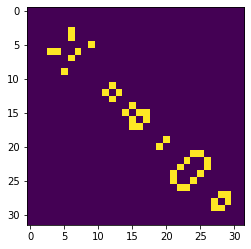

In [18]:
### Show the negihbour list

plt.imshow(neighbourList)
np.set_printoptions(threshold=np.inf)

def printNeighbourList(nbList):
    for x in range(len(ptcs)):
        x_nbsCount = 0;
        x_nbs = [];
        for y in range(len(ptcs)):
            if nbList[x,y] != 0:
                x_nbsCount += 1;
                x_nbs.append(y)
        
        if x_nbsCount != 0:
            print("Particle id: ", x ," has nbs: ", x_nbs)

printNeighbourList(neighbourList)

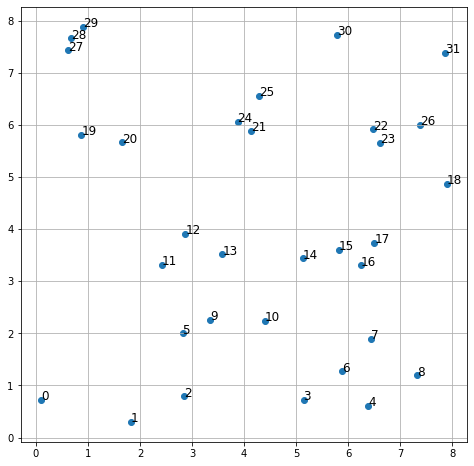

In [19]:
### Visualise the particle and grid

fig, ax = plt.subplots(figsize=(8,8))
plt.scatter(xptcs, yptcs)
plt.xlim = (0,8); plt.ylim = (0,12)
plt.grid()

for i, txt in enumerate(ptcs):
    ax.annotate(txt, (xptcs[i], yptcs[i]), fontsize=12)